In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chinese-mnist-digit-recognizer/chineseMNIST.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
X = df.drop(columns=['label']).to_numpy()
y = df['label'].to_numpy()
X.shape , y.shape

((42000, 784), (42000,))

In [4]:
X.min() , X.max()

(0, 255)

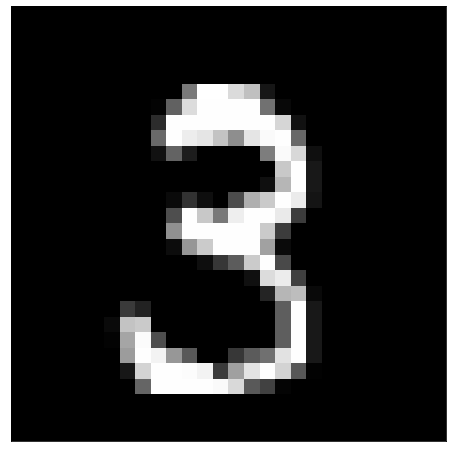

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(X[36,:].reshape((28,28)),cmap='gray')
plt.xticks([])
plt.yticks([]);

In [6]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled.min(), X_scaled.max()

(0.0, 1.0)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,train_size=0.75,random_state=234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31500, 784), (10500, 784), (31500,), (10500,))

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model.fit(X_train,y_train,epochs=5)

2022-11-14 13:40:22.646489: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-14 13:40:22.950471: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
985/985 [==============================] - 2s 1ms/step - loss: 0.5882 - accuracy: 0.8485
Epoch 2/5
985/985 [==============================] - 2s 2ms/step - loss: 0.3340 - accuracy: 0.9068
Epoch 3/5
985/985 [==============================] - 2s 2ms/step - loss: 0.3000 - accuracy: 0.9150
Epoch 4/5
985/985 [==============================] - 1s 1ms/step - loss: 0.2835 - accuracy: 0.9211
Epoch 5/5
985/985 [==============================] - 1s 1ms/step - loss: 0.2724 - accuracy: 0.9232


In [10]:
model.evaluate(X_test,y_test)

329/329 [==============================] - 1s 1ms/step - loss: 0.2802 - accuracy: 0.9245


[0.28021734952926636, 0.9244762063026428]

In [11]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model2.fit(X_train,y_train,epochs=5)

Epoch 1/5
985/985 [==============================] - 3s 2ms/step - loss: 0.3180 - accuracy: 0.9066
Epoch 2/5
985/985 [==============================] - 2s 2ms/step - loss: 0.1328 - accuracy: 0.9590
Epoch 3/5
985/985 [==============================] - 2s 2ms/step - loss: 0.0914 - accuracy: 0.9719
Epoch 4/5
985/985 [==============================] - 2s 2ms/step - loss: 0.0658 - accuracy: 0.9790
Epoch 5/5
985/985 [==============================] - 2s 2ms/step - loss: 0.0491 - accuracy: 0.9840


In [12]:
model2.evaluate(X_test,y_test)

329/329 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9701


[0.10287682712078094, 0.9700952172279358]

In [13]:
y_predict = [np.argmax(i) for i in model2.predict(X_test)]

In [14]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)

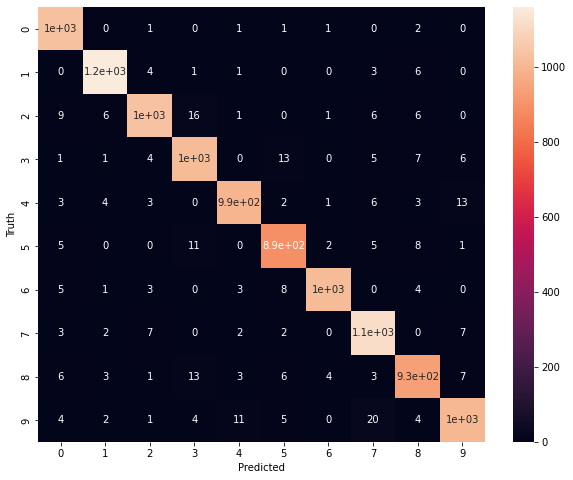

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');


In [16]:
df2 = pd.read_csv('/kaggle/input/chinese-mnist-digit-recognizer/chineseMNIST.csv')
df2

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八


In [17]:
X2 = df2.drop(columns=['label','character']).to_numpy()
y2 = df2['label'].to_numpy()
characters = df2['character']
X2.shape, y2.shape

((15000, 4096), (15000,))

In [18]:
np.unique(y2)

array([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,       100,
            1000,     10000, 100000000])

In [19]:
y2[y2 == 100] = 11
y2[y2 == 1000] = 12
y2[y2 == 10000] = 13
y2[y2 == 100000000] = 14

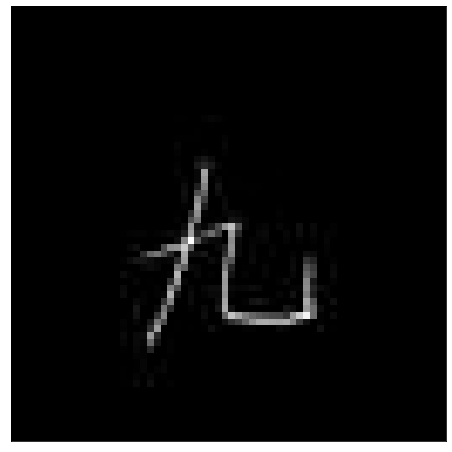

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(X2[24,:].reshape((64,64)),cmap='gray')
plt.xticks([])
plt.yticks([]);

In [21]:
X2_scaled = MinMaxScaler().fit_transform(X2)

In [22]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled,y2,train_size=0.75,random_state=234)
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((11250, 4096), (3750, 4096), (11250,), (3750,))

In [23]:
model3 = keras.Sequential([
    keras.layers.Dense(15,input_shape=(4096,),activation='sigmoid')
])

model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model3.fit(X2_train,y2_train,epochs=5)

Epoch 1/5
352/352 [==============================] - 1s 2ms/step - loss: 2.2981 - accuracy: 0.3274
Epoch 2/5
352/352 [==============================] - 1s 2ms/step - loss: 1.9392 - accuracy: 0.4811
Epoch 3/5
352/352 [==============================] - 1s 2ms/step - loss: 1.7931 - accuracy: 0.5155
Epoch 4/5
352/352 [==============================] - 1s 2ms/step - loss: 1.7015 - accuracy: 0.5348
Epoch 5/5
352/352 [==============================] - 1s 2ms/step - loss: 1.6338 - accuracy: 0.5523


In [24]:
model3.evaluate(X2_test,y2_test)

118/118 [==============================] - 0s 1ms/step - loss: 1.8097 - accuracy: 0.4976


[1.809702754020691, 0.4975999891757965]

In [25]:
model4 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(4096,),activation='relu'),
    keras.layers.Dense(80,activation='relu'),
    keras.layers.Dense(65,activation='relu'),
    keras.layers.Dense(15,activation='softmax')
])

model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model4.fit(X2_train,y2_train,epochs=15)

Epoch 1/15
352/352 [==============================] - 2s 4ms/step - loss: 1.8228 - accuracy: 0.4149
Epoch 2/15
352/352 [==============================] - 1s 4ms/step - loss: 0.8580 - accuracy: 0.7221
Epoch 3/15
352/352 [==============================] - 1s 4ms/step - loss: 0.5073 - accuracy: 0.8325
Epoch 4/15
352/352 [==============================] - 1s 4ms/step - loss: 0.3343 - accuracy: 0.8889
Epoch 5/15
352/352 [==============================] - 1s 4ms/step - loss: 0.2237 - accuracy: 0.9277
Epoch 6/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1608 - accuracy: 0.9472
Epoch 7/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1234 - accuracy: 0.9629
Epoch 8/15
352/352 [==============================] - 1s 4ms/step - loss: 0.1067 - accuracy: 0.9666
Epoch 9/15
352/352 [==============================] - 1s 4ms/step - loss: 0.0861 - accuracy: 0.9725
Epoch 10/15
352/352 [==============================] - 1s 4ms/step - loss: 0.0546 - accuracy: 0.9844

In [26]:
model4.evaluate(X2_test,y2_test)

118/118 [==============================] - 0s 2ms/step - loss: 1.3005 - accuracy: 0.7851


[1.3004765510559082, 0.7850666642189026]

In [27]:
y2_predict = [np.argmax(i) for i in model4.predict(X2_test)]

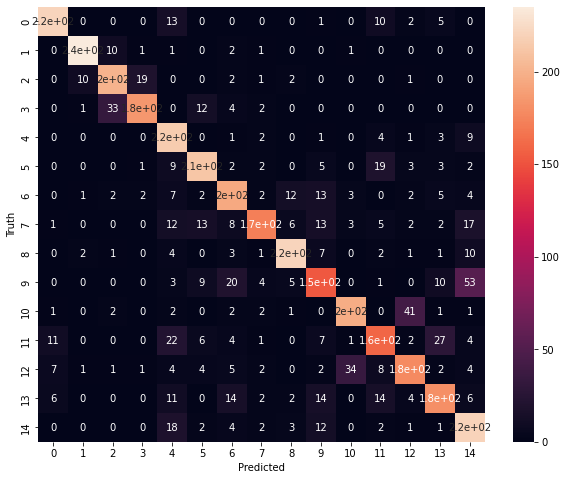

In [28]:
confusion_matrix2 = tf.math.confusion_matrix(labels=y2_test,predictions=y2_predict)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [29]:
df3 = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
df3

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X3 = df3.drop(columns=['label']).to_numpy()
y3 = df3['label'].to_numpy()
X3.shape , y3.shape

((60000, 784), (60000,))

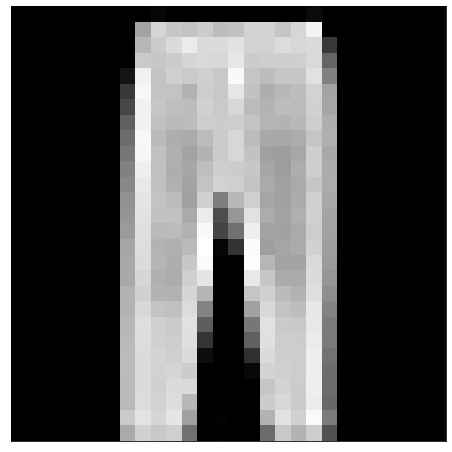

In [31]:
plt.figure(figsize=(8,8))
plt.imshow(X3[39,:].reshape((28,28)),cmap='gray')
plt.xticks([])
plt.yticks([]);

In [32]:
X3_scaled = MinMaxScaler().fit_transform(X3)
X3_scaled.min(), X3_scaled.max()

(0.0, 1.0)

In [33]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled,y3,train_size=0.75,random_state=234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31500, 784), (10500, 784), (31500,), (10500,))

In [34]:
np.unique(y3)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
model.fit(X3_train,y3_train,epochs=5)

Epoch 1/5
1407/1407 [==============================] - 2s 2ms/step - loss: 0.9195 - accuracy: 0.7304
Epoch 2/5
1407/1407 [==============================] - 2s 2ms/step - loss: 0.5346 - accuracy: 0.8180
Epoch 3/5
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4786 - accuracy: 0.8349
Epoch 4/5
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4494 - accuracy: 0.8453
Epoch 5/5
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4352 - accuracy: 0.8491


In [36]:
model.evaluate(X3_test,y3_test)

469/469 [==============================] - 1s 1ms/step - loss: 0.4691 - accuracy: 0.8381


[0.46908608078956604, 0.8381333351135254]

In [37]:
model2.fit(X3_train,y3_train,epochs=10)

Epoch 1/10
1407/1407 [==============================] - 4s 2ms/step - loss: 0.5499 - accuracy: 0.8120
Epoch 2/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3905 - accuracy: 0.8566
Epoch 3/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3570 - accuracy: 0.8700
Epoch 4/10
1407/1407 [==============================] - 4s 2ms/step - loss: 0.3347 - accuracy: 0.8773
Epoch 5/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3161 - accuracy: 0.8852
Epoch 6/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3000 - accuracy: 0.8894
Epoch 7/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2877 - accuracy: 0.8933
Epoch 8/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2791 - accuracy: 0.8971
Epoch 9/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2678 - accuracy: 0.9004
Epoch 10/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.260

In [38]:
model2.evaluate(X3_test,y3_test)

469/469 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8761


[0.35321539640426636, 0.8761333227157593]

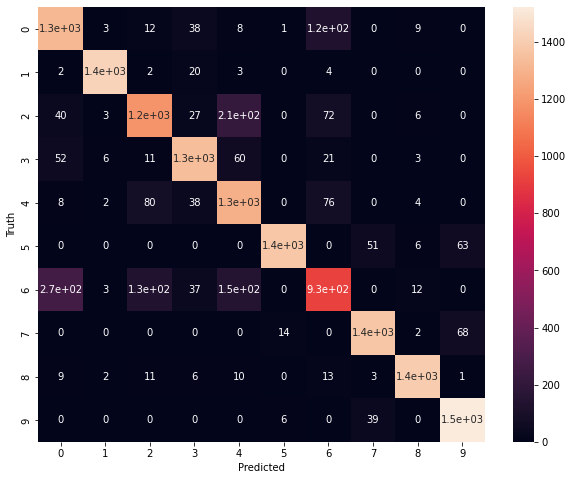

In [39]:
y3_predict = [np.argmax(i) for i in model2.predict(X3_test)]
confusion_matrix3 = tf.math.confusion_matrix(labels=y3_test,predictions=y3_predict)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix3,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');